In [154]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [155]:
df = pd.read_csv('data/cleaned_data.csv')

In [156]:
def evaluate(model,dt_test,dt_train,target_train,target_test):
    pred_test = model.predict(dt_test)
    pred_train = model.predict(dt_train)
    
    print('Evaluations for test:\n', confusion_matrix(target_test, pred_test))
    print(classification_report(target_test, pred_test))
    print('\n')
    print('Evaluations for train:\n',confusion_matrix(target_train, pred_train))
    print(classification_report(target_train, pred_train))

# Decision Tree Regression

In [185]:
# Split into training/test sets
data = df.drop('churn', axis=1)  
target = df['churn']
data_dummies = pd.get_dummies(data)
data_train, data_test, target_train, target_test = train_test_split(data_dummies, target, test_size=0.2, random_state=42)

In [190]:
# Fit model
from sklearn.tree import DecisionTreeRegressor  

regressor = DecisionTreeRegressor(random_state=45)  
regressor.fit(data_train, target_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=45, splitter='best')

In [192]:
# Evaluate model
from sklearn.metrics import mean_absolute_error, mean_squared_error

target_pred = regressor.predict(data_test) 

score = performance(target_test, target_pred)
score

evaluate(regressor, data_test, data_train, target_train, target_test)

r2= {0.3349368505755168} , rmse= {0.08545727136431784}
Evaluations for test:
 [[534  32]
 [ 25  76]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       566
           1       0.70      0.75      0.73       101

    accuracy                           0.91       667
   macro avg       0.83      0.85      0.84       667
weighted avg       0.92      0.91      0.92       667



Evaluations for train:
 [[2284    0]
 [   0  382]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2284
           1       1.00      1.00      1.00       382

    accuracy                           1.00      2666
   macro avg       1.00      1.00      1.00      2666
weighted avg       1.00      1.00      1.00      2666



# Decision Tree Classification

In [46]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [47]:
# Feature importance
tree_clf.feature_importances_

array([0.        , 0.09799309, 0.07251382, 0.31764648, 0.00455355,
       0.13802417, 0.        , 0.01476571, 0.00423472, 0.1157082 ,
       0.08850583, 0.14605444])

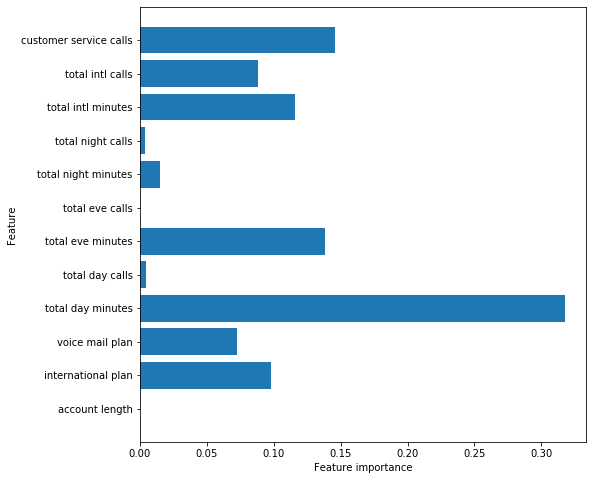

In [48]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [51]:
evaluate(tree_clf, data_test, data_train, target_train, target_test )

Evaluations for test:
 [[556  16]
 [ 26  69]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       572
           1       0.81      0.73      0.77        95

    accuracy                           0.94       667
   macro avg       0.88      0.85      0.87       667
weighted avg       0.93      0.94      0.94       667



Evaluations for train:
 [[2231   47]
 [  89  299]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2278
           1       0.86      0.77      0.81       388

    accuracy                           0.95      2666
   macro avg       0.91      0.87      0.89      2666
weighted avg       0.95      0.95      0.95      2666



# Bagged Tree

In [71]:
# Instantiate a BaggingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [72]:
# Fit to the training data
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [73]:
evaluate(bagged_tree, data_test, data_train, target_train, target_test )

Evaluations for test:
 [[569   3]
 [ 26  69]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       572
           1       0.96      0.73      0.83        95

    accuracy                           0.96       667
   macro avg       0.96      0.86      0.90       667
weighted avg       0.96      0.96      0.95       667



Evaluations for train:
 [[2265   13]
 [  96  292]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2278
           1       0.96      0.75      0.84       388

    accuracy                           0.96      2666
   macro avg       0.96      0.87      0.91      2666
weighted avg       0.96      0.96      0.96      2666



# Random Forest

In [67]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
evaluate(forest, data_test, data_train, target_train, target_test)

Evaluations for test:
 [[572   0]
 [ 55  40]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       572
           1       1.00      0.42      0.59        95

    accuracy                           0.92       667
   macro avg       0.96      0.71      0.77       667
weighted avg       0.92      0.92      0.90       667



Evaluations for train:
 [[2278    0]
 [ 190  198]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2278
           1       1.00      0.51      0.68       388

    accuracy                           0.93      2666
   macro avg       0.96      0.76      0.82      2666
weighted avg       0.93      0.93      0.92      2666



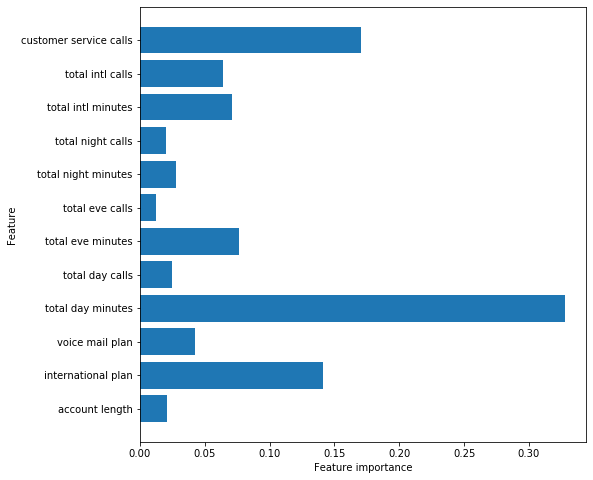

In [69]:
plot_feature_importances(forest)

# GridSearch Tuning

In [88]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [89]:
display(df.describe())

,account length,international plan,voice mail plan,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.096910,0.276628,179.775098,100.435644,200.980348,100.114311,200.872037,100.107711,10.237294,4.479448,1.562856,0.144914
std,39.822106,0.295879,0.447398,54.467389,20.069084,50.713844,19.922625,50.573847,19.568609,2.791840,2.461214,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,87.000000,166.600000,87.000000,167.000000,87.000000,8.500000,3.000000,1.000000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,101.000000,201.400000,100.000000,201.200000,100.000000,10.300000,4.000000,1.000000,0.000000
75%,127.000000,0.000000,1.000000,216.400000,114.000000,235.300000,114.000000,235.300000,113.000000,12.100000,6.000000,2.000000,0.000000
max,243.000000,1.000000,1.000000,350.800000,165.000000,363.700000,170.000000,395.000000,175.000000,20.000000,20.000000,9.000000,1.000000


In [90]:
# GridSearch for decisiontree 
dt_clf = DecisionTreeClassifier()

dt_cv_score = cross_val_score(dt_clf, data_train, target_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 90.36%


In [91]:
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

In [92]:
num_decision_trees = 2 * 6 * 3 * 6
print(f"Grid Search will have to search through {num_decision_trees} different permutations.")

Grid Search will have to search through 216 different permutations.


In [94]:
# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(tree_clf, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(data_train, target_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=5,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 3, 4, 5, 6],
                   

In [95]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(data_test, target_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 93.17%
Mean Test Score: 94.90%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [96]:
evaluate(dt_grid_search, data_test, data_train, target_train, target_test)

Evaluations for test:
 [[560  12]
 [ 22  73]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       572
           1       0.86      0.77      0.81        95

    accuracy                           0.95       667
   macro avg       0.91      0.87      0.89       667
weighted avg       0.95      0.95      0.95       667



Evaluations for train:
 [[2254   24]
 [  83  305]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2278
           1       0.93      0.79      0.85       388

    accuracy                           0.96      2666
   macro avg       0.95      0.89      0.91      2666
weighted avg       0.96      0.96      0.96      2666



In [97]:
# GridSearch for random forest
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, data_train, target_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

C:\Users\khan_\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\khan_\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\khan_\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Mean Cross Validation Score for Random Forest Classifier: 93.25%


In [98]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [99]:
num_decision_trees = 3 * 2 * 6 * 3 * 6
print(f"Grid Search will have to search through {num_decision_trees} different permutations.")

Grid Search will have to search through 648 different permutations.


In [100]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(data_train, target_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 94.60%

Optimal Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 30}


In [101]:
dt_score = dt_grid_search.score(data_test, target_test)
rf_score = rf_grid_search.score(data_test, target_test)

print('Decision tree grid search: ', dt_score)
print('Random forest grid search: ', rf_score)

Decision tree grid search:  0.9490254872563718
Random forest grid search:  0.952023988005997


In [102]:
evaluate(rf_grid_search, data_test, data_train, target_train, target_test)

Evaluations for test:
 [[569   3]
 [ 29  66]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       572
           1       0.96      0.69      0.80        95

    accuracy                           0.95       667
   macro avg       0.95      0.84      0.89       667
weighted avg       0.95      0.95      0.95       667



Evaluations for train:
 [[2278    0]
 [  64  324]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      2278
           1       1.00      0.84      0.91       388

    accuracy                           0.98      2666
   macro avg       0.99      0.92      0.95      2666
weighted avg       0.98      0.98      0.98      2666

